# HDS5210 Final Project: PFAS Contamination in Drinking Water
### Anh Vu

The project will dive into what is PFAS, its usage in our economy and the importance of the chemical in practical, its substantial and dangerous health risks on human and the environment, and how PFAS enter into our living environment. We will then examine data on PFAS contamination in drinking water near populated areas and various locations of where it is widely used, not just commercially but also in federal agencies, such as the military and fire stations. We will use data from the Environmental Protection Agency data on FPAS and the health risks that it posseses.

## Objective

The objective of this project is to examine the claim made by companies like DuPont about their statement that 1) they have stopped discharging PFAS waste into nearby water sources and 2) the contamination level is low and poses no threat to the surrounding areas. We will also look into the heavy usage of PFAS not only within these industrial facilities but also the federal agencies and entities that use equipments and materials that contain PFAS in them. With data on sampling drinking water, provided by the state or state-employed third parties, we can survey level of PFAS in water source and establish a relationship between PFAS pollution level and the nearby entities that use them.

Currently, there are no federally enforceable limits on any PFAS in drinking water, groundwater or soils, or any requirements to clean up PFAS under the federal Superfund law. Only five states have placed limits on a handful of PFAS, and the EPA has the ability to test for only 29 PFAS in drinking water. DuPont claimed that they stopped discharging waster material into water sources since early 2000s and the level of PFAS in water is low and perfectly safe to drink. We hope this study will bring awareness to the potential risks of PFAS and make changes that avert the danger that plagues not only in our lifetimes, but for those that will come after us.

## Background on PFAS, its role in society, and health risks

While a lot of us probably scratched our head wondering wondering what exactly is "PFAS", the chemical, surprisingly enouh, has been around since the early 1950s. It was introduced to the public as a miracle way to get rid of those nasty sticky food bits on pots and pans. I first got to know about PFAS just a year ago through the HBO show "PFAS: Last Week Tonight with John Oliver" ('https://youtu.be/9W74aeuqsiU').

Perfluoroalkyl and polyfluoroalkyl substances (PFAS) are a group of man-made chemicals that include Perfluorooctane Sulfonate (PFOS) and Perfluorooctanoic Acid (PFOA). PFAS are used as products or precursors for materials due to their exceptional water-resistant properties. As such, they are often used in stain repellent products, such as our non-stick pots and pans. Other usages include in coatings, paints, polishes, and aqueous film forming foams which firefighter and the military use to put out fire.

However, the most dangerous properties about PFOA and other PFAS are their longevity and resiliency. Scientists estimate PFAS would mever break down in the environment, or some estimate it would take hundreds of thousands of years to break down, which promptly give it the infamous name the "forever chemical". Thanks to its resiliency, the chemical is extremely hard to dispose. While it is possible to burn them, PFAS has a very high boiling points, making it costly for disposal; also they would evaporate into a toxic fluoro gas and decompose into hydrofluoric acid.

The most notorious of the groups are PFOA. Even a small dose of PFOA and some other PFAS have been linked to kidney and testicular cancer, thyroid issues, high cholesterol, reproductive and developmental harms and reduced effectiveness of vaccines, rendering not only individuals with immunodeficiencies at risk but also putting those who have weak immune systems like children and the elderly. 

Now hold on before you start throwing out all of your non-stick pans. Good news is PFAS is very unlikely to leech off from your pan unless the pan is overheated or scratched. The bad news is you are more likely to have PFAS infected into you through clothing, food wrappers and containers, and your drinking water. Discharged PFAS over the past 50 years by companies like DuPont and 3M, which knew it was dangerous as early as the 1950s, will remain in the environment until it’s actively remediated.



## Data Set Preparation

The data is collected by the United States Environmental Protection Agency ranging from variables that we are interested in, such as locations, testing method, and test results, etc to those that we do not need, like latitude and longtitude, etc. We will need to filter columns of interest into separate dataframes, and locate alligned variables among the files for comparison and analytic performance.

In [1]:
#import packages and read in data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read excel files from the EPA
facility_data = pd.read_excel('/home/jupyter-anhvu1995/hds5210-2022/final/Facilities_in_industries_that_may_be_handling_PFAS_01-03-2022.xlsx', sheet_name = 'Data')
environmental_media_data = pd.read_excel('/home/jupyter-anhvu1995/hds5210-2022/final/Environmental_Media_Sampling_Data_01-03-2022.xlsx', sheet_name = 'Data')
PFAS_discharge_monitor_data = pd.read_excel('/home/jupyter-anhvu1995/hds5210-2022/final/PFAS_Discharge_Monitoring_Report_Data_01-03-2022.xlsx', sheet_name = 'Data')
federal_agency_data = pd.read_excel('/home/jupyter-anhvu1995/hds5210-2022/final/Federal_Agency_Locations_with_Known_or_Suspected_PFAS_Detections_02-28-2022.xlsx', sheet_name = 'Data')

**Filter Variable of Interests**

Let's tackle the drinking water sample provided by the state. We want to know the location's characteristics (state, county, population), and detected contaminants and its concentration. In order to do so, we will create a function to smoothly transition our large data sets into smaller and more manageable dataframes.

In [2]:
#create a function to filter variables of interest
def select_column (dataframe, lis):
    """This function is designed to filter down the variable of interest by using a selected dataframe and a list of selected variables.
    Then, it returns a new dataframe with only the selected variables"""
    
    filtered_dataframe = dataframe[lis]
    return filtered_dataframe

In [3]:
#filter variables of interest from 'facility_data'
facility_filtered = select_column (facility_data, ['Facility', 'State', 'City', 'Status', 'Industry', 'FAC_COMPLIANCE_STATUS'])
#filter variables of interest from 'environmental_media_data'
environmental_media_filtered = select_column (environmental_media_data, ['State Territory or Tribe', 'Environmental Media Name', 'Year',
                                                                        'Result Detection', 'PFAS Chemical Name', 'Result Measure Value (ppt)'])
#filter variables of interest from 'PFAS_discharge_monitor_data'
PFAS_discharge_monitor_filtered = select_column (PFAS_discharge_monitor_data, ['Year', 'Facility', 
                                                                               'Parameter Description', 'Pollutant Load (kg/yr)', 'State Territory or Tribe'])
#filter variables of interest from 'federal_agency_data'
federal_agency_filtered = select_column (federal_agency_data, ['Federal Agency', 'State Territory or Tribe', 'PFAS Presence',
                                                               'PFOA Maximum Detected (ppt) in groundwater', 
                                                               'PFOS Maximum Detected (ppt) in groundwater',
                                                               'PFBS Maximum Detected (ppt) in groundwater'])


In [4]:
facility_filtered

,Facility,State,City,Status,Industry,FAC_COMPLIANCE_STATUS
0,ACE FUELS MERRILL SKI STRIP,AK,ANCHORAGE,Inactive,Airports,-
1,"AIRLINE SUPPORT INC/AIRLINE SUPPORT, INC",AK,ANCHORAGE,Active,Airports,No Violation Identified
2,ANC AK HOLDINGS LLC DBA ROSS AVIATION-ANCHORAGE,AK,ANCHORAGE,Inactive,Airports,-
3,ANCHORAGE INTERNATIONAL AIRPORT,AK,ANCHORAGE,Active,Airports,Violation Identified
4,EXECUTIVE HANGARS OWNERS ASSOC,AK,ANCHORAGE,Inactive,Airports,-
...,...,...,...,...,...,...
131327,-,-,-,Unknown,-,-
131328,-,-,-,Unknown,-,-
131329,-,-,-,Unknown,-,-
131330,-,-,-,Unknown,-,-


**Replacing N/A value**

The EPA doesn't leave blank for their N/A value. Instead, they coded non-value with `-`. This makes it difficult when we try to calculate and analyze mathematical values. So, we will replace them with `NaN`.

In [5]:
#missing or none values are coded with '-' and will interfere with our analytics, so we will replace them with NaN
facility_filtered = facility_filtered.replace(['-'], np.nan)
environmental_media_filtered = environmental_media_filtered.replace(['-'], np.nan)
PFAS_discharge_monitor_filtered = PFAS_discharge_monitor_filtered.replace(['-'], np.nan)
federal_agency_filtered = federal_agency_filtered.replace(['-'], np.nan)

### Federal Agency PFAS Detection Data Preparation

In [6]:
federal_agency_filtered

,Federal Agency,State Territory or Tribe,PFAS Presence,PFOA Maximum Detected (ppt) in groundwater,PFOS Maximum Detected (ppt) in groundwater,PFBS Maximum Detected (ppt) in groundwater
0,Army,MH,Suspected,NaN,NaN,NaN
1,Navy,GU,Suspected,NaN,NaN,NaN
2,Navy,GU,Known Detection,NaN,NaN,NaN
3,Army,GU,Suspected,NaN,NaN,NaN
4,Navy,GU,Suspected,NaN,NaN,NaN
...,...,...,...,...,...,...
700,FUDS,RI,NaN,NaN,NaN,NaN
701,Army,IN,NaN,NaN,NaN,NaN
702,Army,TX,NaN,NaN,NaN,NaN
703,Army,TX,NaN,NaN,NaN,NaN


In [7]:
federal_agency_filtered['Federal Agency'].value_counts()

Army         337
Air Force    204
Navy         148
DLA            7
FUDS           4
USCG           1
DOT FAA        1
NASA           1
DOE            1
USDA           1
Name: Federal Agency, dtype: int64

In [8]:
# checking columns' data's type
federal_agency_filtered.dtypes

Federal Agency                                 object
State Territory or Tribe                       object
PFAS Presence                                  object
PFOA Maximum Detected (ppt) in groundwater    float64
PFOS Maximum Detected (ppt) in groundwater    float64
PFBS Maximum Detected (ppt) in groundwater    float64
dtype: object

In [9]:
# create new column to indicate PFAS level according to the EPA guidline
federal_agency_filtered['PFOA Safety Level'] = np.nan
federal_agency_filtered['PFOS Safety Level'] = np.nan
federal_agency_filtered['PFBS Safety Level'] = np.nan

In [10]:
federal_agency_filtered.dtypes

Federal Agency                                 object
State Territory or Tribe                       object
PFAS Presence                                  object
PFOA Maximum Detected (ppt) in groundwater    float64
PFOS Maximum Detected (ppt) in groundwater    float64
PFBS Maximum Detected (ppt) in groundwater    float64
PFOA Safety Level                             float64
PFOS Safety Level                             float64
PFBS Safety Level                             float64
dtype: object

In [11]:
# categorize a basic safety system to distinguish PFOA level in groundwater
federal_agency_filtered.loc[(federal_agency_filtered['PFOA Maximum Detected (ppt) in groundwater'] >= 0)&
                            (federal_agency_filtered['PFOA Maximum Detected (ppt) in groundwater'] < 0.004), 
                             'PFOA Safety Level'] = 'Below Safety Limit'
federal_agency_filtered.loc[(federal_agency_filtered['PFOA Maximum Detected (ppt) in groundwater'] >= 0.004)&
                            (federal_agency_filtered['PFOA Maximum Detected (ppt) in groundwater'] < 0.04), 
                             'PFOA Safety Level'] = 'Above Safety Limit'
federal_agency_filtered.loc[(federal_agency_filtered['PFOA Maximum Detected (ppt) in groundwater'] >= 0.04), 
                             'PFOA Safety Level'] = '10x Above Safety Limit'

In [12]:
federal_agency_filtered.head

<bound method NDFrame.head of     Federal Agency State Territory or Tribe    PFAS Presence  \
0             Army                       MH        Suspected   
1             Navy                       GU        Suspected   
2             Navy                       GU  Known Detection   
3             Army                       GU        Suspected   
4             Navy                       GU        Suspected   
..             ...                      ...              ...   
700           FUDS                       RI              NaN   
701           Army                       IN              NaN   
702           Army                       TX              NaN   
703           Army                       TX              NaN   
704           Army                       UT              NaN   

     PFOA Maximum Detected (ppt) in groundwater  \
0                                           NaN   
1                                           NaN   
2                                           NaN 

In [13]:
# categorize a basic safety system to distinguish PFBS level in groundwater
federal_agency_filtered.loc[(federal_agency_filtered['PFBS Maximum Detected (ppt) in groundwater'] >= 0)&
                            (federal_agency_filtered['PFBS Maximum Detected (ppt) in groundwater'] < 2000), 
                             'PFBS Safety Level'] = 'Below Safety Limit'
federal_agency_filtered.loc[(federal_agency_filtered['PFBS Maximum Detected (ppt) in groundwater'] >= 2000)&
                            (federal_agency_filtered['PFBS Maximum Detected (ppt) in groundwater'] < 20000), 
                             'PFBS Safety Level'] = 'Above Safety Limit'
federal_agency_filtered.loc[(federal_agency_filtered['PFBS Maximum Detected (ppt) in groundwater'] >= 20000), 
                             'PFBS Safety Level'] = '10x Above Safety Limit'

In [14]:
# categorize a basic safety system to distinguish PFOS level in groundwater
federal_agency_filtered.loc[(federal_agency_filtered['PFOS Maximum Detected (ppt) in groundwater'] >= 0)&
                            (federal_agency_filtered['PFOS Maximum Detected (ppt) in groundwater'] < 0.02), 
                             'PFOS Safety Level'] = 'Below Safety Limit'
federal_agency_filtered.loc[(federal_agency_filtered['PFOS Maximum Detected (ppt) in groundwater'] >= 0.02)&
                            (federal_agency_filtered['PFOS Maximum Detected (ppt) in groundwater'] < 0.2), 
                             'PFOS Safety Level'] = 'Above Safety Limit'
federal_agency_filtered.loc[(federal_agency_filtered['PFOS Maximum Detected (ppt) in groundwater'] >= 0.2), 
                             'PFOS Safety Level'] = '10x Above Safety Limit'

In [15]:
# summarizing the severity of PFAS contamination in groundwater from each federal agency
FedPFOA = federal_agency_filtered.pivot_table(
    values = 'PFOA Maximum Detected (ppt) in groundwater',
    index = 'Federal Agency',
    columns = 'PFOA Safety Level',
    aggfunc = np.ma.count,
    fill_value = 0)
FedPFOS = federal_agency_filtered.pivot_table(
    values = 'PFOS Maximum Detected (ppt) in groundwater',
    index = 'Federal Agency',
    columns = 'PFOS Safety Level',
    aggfunc = np.ma.count,
    fill_value = 0)
FedPFBS = federal_agency_filtered.pivot_table(
    values = 'PFBS Maximum Detected (ppt) in groundwater',
    index = 'Federal Agency',
    columns = 'PFBS Safety Level',
    aggfunc = np.ma.count,
    fill_value = 0)

### Environmental Media Sample Data Preparation

In [16]:
environmental_media_filtered.head

<bound method NDFrame.head of       State Territory or Tribe Environmental Media Name  Year  \
0                           MI                   Tissue  2011   
1                           MI                   Tissue  2011   
2                           MI                   Tissue  2011   
3                           MI                   Tissue  2011   
4                           MI                   Tissue  2011   
...                        ...                      ...   ...   
87845                       WY                    Water  2021   
87846                       WY                    Water  2021   
87847                       WY                    Water  2021   
87848                       WY                    Water  2021   
87849                       WY                    Water  2021   

      Result Detection                                 PFAS Chemical Name  \
0        PFAS Detected  1-Decanesulfonic acid, 1,1,2,2,3,3,4,4,5,5,6,6...   
1        PFAS Detected             

In [17]:
environmental_media_filtered['Result Measure Value (ppt)'] = environmental_media_filtered['Result Measure Value (ppt)'].fillna(0)

In [18]:
environmental_media_filtered

,State Territory or Tribe,Environmental Media Name,Year,Result Detection,PFAS Chemical Name,Result Measure Value (ppt)
0,MI,Tissue,2011,PFAS Detected,"1-Decanesulfonic acid, 1,1,2,2,3,3,4,4,5,5,6,6...",0.0000
1,MI,Tissue,2011,PFAS Detected,Heptafluorobutyric acid,0.0000
2,MI,Tissue,2011,PFAS Detected,Perfluorobutanesulfonic acid,0.0000
3,MI,Tissue,2011,PFAS Detected,Perfluorohexanesulfonic acid,0.0000
4,MI,Tissue,2011,PFAS Detected,Perfluoromyristic acid***retired***use Perfluo...,0.0000
...,...,...,...,...,...,...
87845,WY,Water,2021,Not Detected,Tetraconazole,0
87846,WY,Water,2021,Not Detected,Tetraconazole,0
87847,WY,Water,2021,Not Detected,Tetraconazole,0
87848,WY,Water,2021,Not Detected,Tetraconazole,0


In [19]:
# change data type
environmental_media_filtered['Result Measure Value (ppt)'] = pd.to_numeric(environmental_media_filtered['Result Measure Value (ppt)'])

In [20]:
environmental_media_filtered['PFAS Chemical Name'].value_counts()

Tetraconazole                                                                                                                        33914
CFC-114                                                                                                                               4199
Perfluorooctanoic acid                                                                                                                4071
Perfluorononanoic acid                                                                                                                3445
Perfluorohexanoic acid                                                                                                                3370
                                                                                                                                     ...  
1-Hexanesulfonic acid, 1,1,2,2,3,3,4,4,5,5,6,6,6-tridecafluoro-, ion(1-)                                                                10
2,2,3-Trifluoro-3-[1,1,2,2,

In [21]:
# checking dtype
environmental_media_filtered.dtypes

State Territory or Tribe       object
Environmental Media Name       object
Year                            int64
Result Detection               object
PFAS Chemical Name             object
Result Measure Value (ppt)    float64
dtype: object

In [22]:
# putting the PFAS into a dataframe categorizing by state
environmental_media_filtered_by_year = environmental_media_filtered.pivot_table(
    values = 'Result Measure Value (ppt)',
    index = 'Year',
    columns = 'State Territory or Tribe',
    aggfunc = np.ma.mean,
    fill_value = 0)

environmental_media_filtered_by_year_table = environmental_media_filtered.pivot_table(
    values = 'Result Measure Value (ppt)',
    index = 'State Territory or Tribe',
    columns = 'Year',
    aggfunc = np.ma.mean,
    fill_value = 0)

### Facilities that Used PFAS Data Preparation

In [23]:
facility_filtered['FAC_COMPLIANCE_STATUS'].value_counts()

No Violation Identified    93325
Violation Identified        4387
Significant Violation       2572
Violation                    985
Unknown                      719
Inactive                      42
Name: FAC_COMPLIANCE_STATUS, dtype: int64

In [24]:
facility_filtered

,Facility,State,City,Status,Industry,FAC_COMPLIANCE_STATUS
0,ACE FUELS MERRILL SKI STRIP,AK,ANCHORAGE,Inactive,Airports,NaN
1,"AIRLINE SUPPORT INC/AIRLINE SUPPORT, INC",AK,ANCHORAGE,Active,Airports,No Violation Identified
2,ANC AK HOLDINGS LLC DBA ROSS AVIATION-ANCHORAGE,AK,ANCHORAGE,Inactive,Airports,NaN
3,ANCHORAGE INTERNATIONAL AIRPORT,AK,ANCHORAGE,Active,Airports,Violation Identified
4,EXECUTIVE HANGARS OWNERS ASSOC,AK,ANCHORAGE,Inactive,Airports,NaN
...,...,...,...,...,...,...
131327,NaN,NaN,NaN,Unknown,NaN,NaN
131328,NaN,NaN,NaN,Unknown,NaN,NaN
131329,NaN,NaN,NaN,Unknown,NaN,NaN
131330,NaN,NaN,NaN,Unknown,NaN,NaN


In [25]:
# grouping no. violation based on state
facility_filtered.groupby('State').agg({'FAC_COMPLIANCE_STATUS' : 'count'})

,FAC_COMPLIANCE_STATUS
State,
AK,605
AL,1326
AP,1
AR,687
AS,2
...,...
WI,1245
WV,570
WY,205


In [26]:
# create pivot tables to analyze and a base for visualization

facility_state_filtered_industry = facility_filtered.pivot_table(
    values = 'Facility',
    index = 'Industry',
    columns = 'FAC_COMPLIANCE_STATUS',
    aggfunc = np.ma.count,
    fill_value = 0)

### PFAS Discharged Data Preparation

In [27]:
PFAS_discharge_monitor_filtered.head

<bound method NDFrame.head of       Year                            Facility     Parameter Description  \
0     2018  3M SPECIALTY FILM & MEDIA PRODUCTS    Perfluorobutanoic Acid   
1     2019  3M SPECIALTY FILM & MEDIA PRODUCTS    Perfluorobutanoic Acid   
2     2017  3M SPECIALTY FILM & MEDIA PRODUCTS    Perfluorobutanoic Acid   
3     2013  3M SPECIALTY FILM & MEDIA PRODUCTS    Perfluorobutanoic Acid   
4     2014  3M SPECIALTY FILM & MEDIA PRODUCTS    Perfluorobutanoic Acid   
...    ...                                 ...                       ...   
5944  2021           2C WATER MAIN REPLACEMENT    Perfluorononanoic acid   
5945  2020           2C WATER MAIN REPLACEMENT  Perfluorooctanesulfonate   
5946  2021           2C WATER MAIN REPLACEMENT  Perfluorooctanesulfonate   
5947  2020           2C WATER MAIN REPLACEMENT       Total PFOA and PFOS   
5948  2021           2C WATER MAIN REPLACEMENT       Total PFOA and PFOS   

      Pollutant Load (kg/yr) State Territory or Tribe  
0

In [28]:
# changing column name 'State Territory or Tribe' due to intererence that prevents query
PFAS_discharge_monitor_filtered = PFAS_discharge_monitor_filtered.rename(columns = {'Parameter Description':'Parameter'})

In [29]:
# query based on the chemical Perfluorobutanoic Acid
Perfluorobutanoic_query = PFAS_discharge_monitor_filtered.query('Parameter == "Perfluorobutanoic Acid"')

In [30]:
# compile into a dataframe
Perfluorobutanoic_company = Perfluorobutanoic_query.pivot_table(
    values = 'Pollutant Load (kg/yr)',
    index = 'Year',
    columns = 'Facility',
    fill_value = 0)

# remove rows with all '0' in values 
Perfluorobutanoic_company = Perfluorobutanoic_company.loc[~(Perfluorobutanoic_company==0).all(axis=1)]


In [31]:
# query based on the chemical C3 Dimer
C3dimer_query = PFAS_discharge_monitor_filtered.query('Parameter == "C3 Dimer Acid/Salt"')

In [32]:
# compile into a dataframe
C3dimer_company = C3dimer_query.pivot_table(
    values = 'Pollutant Load (kg/yr)',
    index = 'Year',
    columns = 'Facility',
    fill_value = 0)

# remove rows with all '0' in values 
C3dimer_company = C3dimer_company.loc[~(C3dimer_company==0).all(axis=1)]

#### create a baseline guide for the Lifetime Health Advisory Level (ppt) of PFAS using the guideline from 'https://www.epa.gov/sdwa/questions-and-answers-drinking-water-health-advisories-pfoa-pfos-genx-chemicals-and-pfbs'


In [33]:
PFAS_safety_guide = pd.DataFrame(np.array([[4, 0.004], [4, 0.02], [5, 10], [3, 2000]]),
                    index=['PFOA', 'PFOS', 'GenX', 'PFBS'],
                   columns=['Minimum Reporting Level (ppt)', 'Lifetime Health Advisory Level (ppt)'])

## Data Analysis 

This data shows the drinking water testing data report of each state and region. They tested for PFAS and other perfluoroalkyl and polyfluoroalkyl substances chemical contaminant such as PFOS, PFMOAA, etc. 

The EPA designates the health advisory levels for PFOA and PFOS contamination levels in items and drinking water; however, they are below the level of detection (determining whether or not a substance is present) and quantitation (the ability to reliably determine how much of a substance is present) possible with the current PFAS detection method. This means that it is possible for PFOA or PFOS to be present in drinking water at levels that exceed health advisories even if testing indicates no level of these chemicals. Lifetime Health Advisory Levels in parts per trillion (ppt) for the top 3 most widely and commonly used PFAS chemicals, with GenX being the new replacement for them, are as follow:




In [34]:
PFAS_safety_guide

,Minimum Reporting Level (ppt),Lifetime Health Advisory Level (ppt)
PFOA,4.0,0.004
PFOS,4.0,0.020
GenX,5.0,10.000
PFBS,3.0,2000.000


The data below shows the amount and level of contamination (ppt) of PFAS detected in the environment on average across each state. The testing was done by the EPA or its associated entities.

In [35]:
environmental_media_filtered_by_year_table

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State Territory or Tribe,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7426.923077,...,0.000000,1604.772727,497.132159,0.000000,0.073265,0.000000,0.080889,0.000000,0.000000,0.000000
AR,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,671.213740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AZ,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,91.233577,976.523077,0.000000,0.000000,0.145349,0.000000,0.000000,0.000000,0.000000
CA,0,0,0,0.000000,0.000000,0.000000,83.496296,123.856410,0.828791,1.476889,...,0.000000,60.684650,0.090039,0.125765,0.169661,3.780181,0.000000,0.035759,0.000000,0.000000
CO,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,109.292035,1328.550725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CT,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,707.692308,2618.589744,...,0.000000,0.000000,1372.122951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DC,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DE,0,0,0,0.000000,0.000000,0.000000,0.000000,108.550000,1296.724286,1337.315652,...,0.000000,144.939394,7108.750000,3.589107,85.985714,0.000000,0.000000,0.000000,0.000000,0.850929


Using data from `Facilities_in_industries_that_may_be_handling_PFAS_01-03-2022.xlsx` file, we can observe what are the most prominent economic players in each of the state. We can also identify the industries that heavily used PFAS equipments and chemical, and their violation in disposing PFAS chemicals.

In [36]:
facility_filtered['Industry'].value_counts()

Oil and Gas                 36123
Waste Management            18443
Metal Coating               10901
Chemical Mfg                10414
Plastics and Resins          8197
Electronics Industry         7814
Mining and Refining          6468
Metal Machinery Mfg          5243
Printing                     4961
Airports                     3305
Textiles and Leather         2981
Paints and Coatings          2980
Petroleum                    2950
Paper Mills and Products     2353
Cleaning Product Mfg         2122
National Defense             1934
Industrial Gas               1078
Glass Products                754
Airports (Part 139)           531
Consumer Products             478
Furniture and Carpet          460
Fire Training                 446
Cement Mfg                    388
Name: Industry, dtype: int64

Number and the degree of violations in each industry. Categoroies are:
* Inactive
* No Violation Identified
* Significant Violation 
* Unknown
* Violation 
* Violation Identified

In [37]:
facility_state_filtered_industry

FAC_COMPLIANCE_STATUS,Inactive,No Violation Identified,Significant Violation,Unknown,Violation,Violation Identified
Industry,,,,,,
Airports,0,2290,139,42,10,205
Cement Mfg,0,242,41,1,4,27
Chemical Mfg,0,7692,437,97,151,676
Cleaning Product Mfg,0,1655,22,7,24,101
Consumer Products,0,393,5,4,1,26
Electronics Industry,0,6648,50,26,100,135
Fire Training,28,117,2,3,1,5
Furniture and Carpet,0,388,10,0,0,0
Glass Products,0,596,17,12,4,32


Looking at specific chemical and the top polluters measured by the volume of discharge amount throughout the year:
* Perfluorobutanoic Acid
* GenX (new PFAS chemical)

In [38]:
Perfluorobutanoic_company.head()

Facility,1301 BROADWAY,1401 WYNKOOP PARKING GARAGE,1515 VRAIN ST,1800 LARIMER LLC,3M COMPANY,3M SPECIALTY FILM & MEDIA PRODUCTS,675 15 ST,ARTIS HRA HUDSONS BAY,AURARIA SCIENCE BUILDING,BLUE LAKE WASTEWATER TREATMENT PLANT,...,ROXBOROUGH LIFT STATION,SAFEWAY INC,SENECA WASTEWATER TREATMENT PLANT,SOUTH CANYON LANDFILL,"ST. PAUL PARK REFINING COMPANY, LLC",SUGAR CUBE BUILDING,SW KEY CENTER ELEVATOR,U.S. NAVY NAVAL STATION NEWPORT,WYNKOOP OWNER LLC,Z BLOCK
Year,,,,,,,,,,,,,,,,,,,,,
2007,0,0,0,0,46.100196,0.0,0,0,0,0.000000,...,0,0,0,0,0.0,0,0,0.0,0,0
2008,0,0,0,0,6.656938,0.0,0,0,0,0.000000,...,0,0,0,0,0.0,0,0,0.0,0,0
2009,0,0,0,0,9.457840,0.0,0,0,0,0.000000,...,0,0,0,0,0.0,0,0,0.0,0,0
2010,0,0,0,0,2.410822,0.0,0,0,0,0.431528,...,0,0,0,0,0.0,0,0,0.0,0,0
2011,0,0,0,0,12.921371,0.0,0,0,0,0.644634,...,0,0,0,0,0.0,0,0,0.0,0,0


In [39]:
C3dimer_company.head()

Facility,E I DUPONT DE NEMOURS- WASHINGTON WORKS,LITTLE HOCKING WTP,N.G.I
Year,,,
2012,37.270941,0.0,0.0
2013,440.352338,0.0,0.0
2014,126.307823,0.0,0.0
2015,267.874215,0.0,0.0
2016,74.898615,0.0,0.0


PFAS is widely used not only commercially, but also within the federal agency. These are the reports of PFAS contamination level found in groundwater near federal agencies' base. The tests were carried out by the Department of Defense, based on the presence of PFAS chemical components in the equipment and items used by the sites. 

In [40]:
FedViolation = federal_agency_filtered.groupby('Federal Agency').agg({'PFOA Maximum Detected (ppt) in groundwater':'count', 
                                                                      'PFOS Maximum Detected (ppt) in groundwater':'count', 
                                                                      'PFBS Maximum Detected (ppt) in groundwater': 'count'})


In [41]:
FedViolation

,PFOA Maximum Detected (ppt) in groundwater,PFOS Maximum Detected (ppt) in groundwater,PFBS Maximum Detected (ppt) in groundwater
Federal Agency,,,
Air Force,59,59,12
Army,2,3,1
DLA,4,4,0
DOE,0,0,0
DOT FAA,0,0,0
FUDS,0,0,0
NASA,0,0,0
Navy,29,29,29
USCG,0,0,0


In [42]:
FedPFOA

PFOA Safety Level,10x Above Safety Limit
Federal Agency,
Air Force,59
Army,2
DLA,4
Navy,29


In [43]:
FedPFOS

PFOS Safety Level,10x Above Safety Limit
Federal Agency,
Air Force,59
Army,3
DLA,4
Navy,29


In [44]:
FedPFBS

PFBS Safety Level,10x Above Safety Limit,Above Safety Limit,Below Safety Limit
Federal Agency,,,
Air Force,12,0,0
Army,0,1,0
Navy,6,6,17


## Visual Presentation

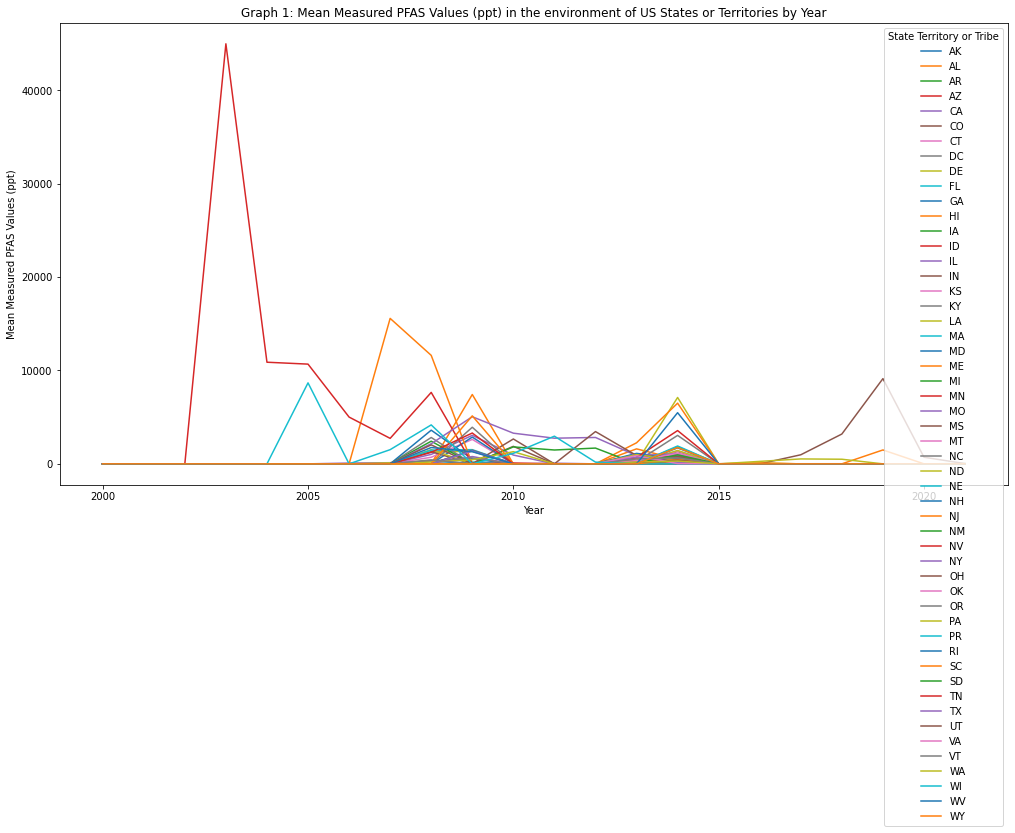

In [45]:
environmental_media_filtered_by_year.plot(title='Graph 1: Mean Measured PFAS Values (ppt) in the environment of US States or Territories by Year',
                                          ylabel='Mean Measured PFAS Values (ppt)',
                                          xlabel='Year',
                                          figsize=(17,8.5))

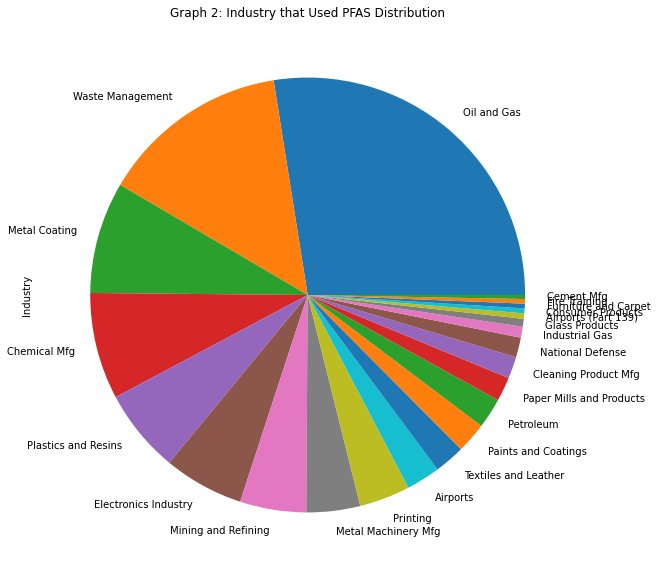

In [46]:
facility_filtered['Industry'].value_counts().plot.pie(title='Graph 2: Industry that Used PFAS Distribution',
                                                    figsize=(10, 10))

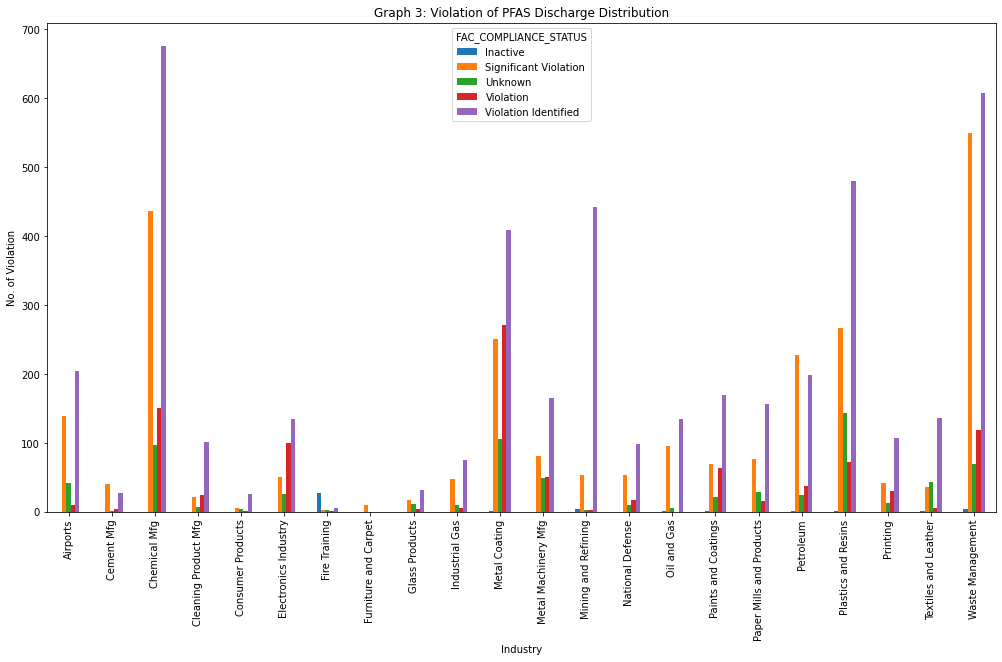

In [47]:
# remove 'No Violation' from 'FAC_COMPLIANCE_STATUS' column; otherwise data will be skewed
no_violation = facility_state_filtered_industry.drop(columns='No Violation Identified')
no_violation.plot.bar(title='Graph 3: Violation of PFAS Discharge Distribution',
                                          ylabel= 'No. of Violation',
                                          figsize=(17,9))

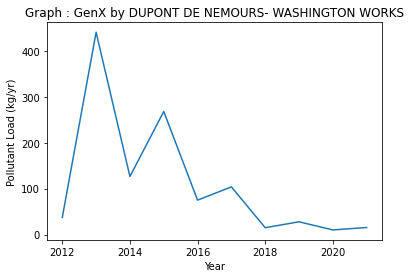

In [48]:
C3dimer_company['E I DUPONT DE NEMOURS- WASHINGTON WORKS'].plot(title='Graph : GenX by DUPONT DE NEMOURS- WASHINGTON WORKS',
                                                                ylabel='Pollutant Load (kg/yr)')


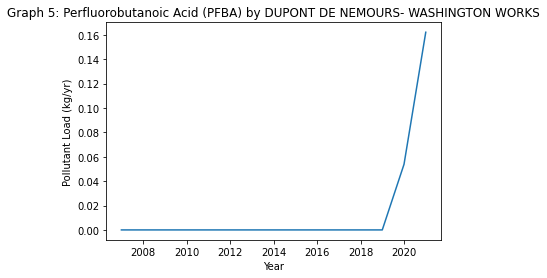

In [49]:
Perfluorobutanoic_company['E I DUPONT DE NEMOURS- WASHINGTON WORKS'].plot(title='Graph 5: Perfluorobutanoic Acid (PFBA) by DUPONT DE NEMOURS- WASHINGTON WORKS',
                                            ylabel='Pollutant Load (kg/yr)')


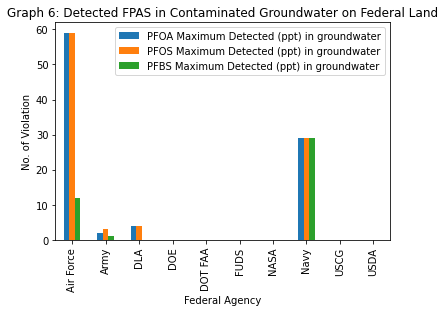

In [50]:
FedViolation.plot.bar(title='Graph 6: Detected FPAS in Contaminated Groundwater on Federal Land',
                      ylabel= 'No. of Violation')

## Results
### PFAS in the Environment
Observation from graph 1 give us an indicator of the contamination of PFAS in the environment throughout the year. We can see a heavy spike in the early 2000 until the mid 2020. Minnesota had the highest spike among the states, following in the next few years by Wisconsin, Maine, and California. In the late 2020, environment PFAS detection goes down low across the state except for Indiana.

### PFAS Usage in the Industry and Discharge Violation
Across the industrial sector, the most prominent usages of PFAS are in 'Oil and Gas', following by 'Waste Management' and 'Metal Coating', respectively. PFAS discharge violations are seen with the highest number in the 'Chemical Mfg', followed by 'Waste Management', 'Plastic and Resin', 'Mining and Refining', and 'Metal Coating' respectively. The most severe violators are in 'Chemical Mfg' and 'Waste Management'.

### Facilities in Industries that Handles PFAS Chemical
Companies used different FPAS chemical over the year. We observed one company in particular, 'DuPont', was using a type of PFAS called GenX from 2012, with pollutant reaching highest at above 440kg/year, and slowly faded out after 2018, decreasing pollutant to less than 30kg/year. However, we see an emergence of a new chemical called PFBA, and its usage has been increasing steadily.

### Federal Agencies' PFAS Detection in Groundwater
Detection of PFAS has been found around federal lands, with the highest number of detected PFAS on-site to be with the air force and the navy. The quantities of violation are small in comparison to non-detected from the dataset; however, when detection is found, the degree of PFAS detected exceeded 10 times the safety baseline recommended by the EPA.


## Conclusion
Looking at the data and the visual of PFAS chemical presence in the environment can be misleading. Multiple studies have shown that PFAS chemicals do not naturally decompose in nature. While the PFAS contamination levels have gone down in some states over the year, this also indicates PFAS chemicals do not remain at one location, being moved away by rainfall or natural underground water.

We observe that the level of PFAS contamination also have a correlation with the location of industries that handled PFAS. One example is that Minnesota used to be one of the top leading chemical manufacturing in the country. Complement it with the heavy use of waste management, the PFAS level of the state was very high in the early 2000s. The trend then slowly shifted towards California, Maine, and Wisconsin as these states begin to high-tech manufacturing. Some other states also see a small rise in PFAS contaminant due to mining and refining.

In the search for data, we discovered that federal agencies also play a major part in spreading PFAS into the surrounding areas. Due to its ability to separate out oil, PFAS is very effective in putting out fire, which is why it is heavily used in firefighting agencies and for putting out jet fire or burning pits. However, PFAS when burned at high temperature releases toxic fume that are known to be carcinogens. Long exposure can cause loss of smell, sights, and cancers.

Once we started to look at the top facilities that handled PFAS chemicals, we can see a high level of PFAS discharge violation among them, with the top players being 3M and DuPont. GenX was the new chemical developed by DuPont to replace the older PFAS chemicals, such as PFOA and PFOS. However, research showed GenX posed similar health risks to its predecessors. Yet, when examined closely, we see that GenX usage in DuPont factories went down after the findings were found and the government imposed regulation on its disposal and discharge.in the mid of 2018, PFBA was introduced and has seen a steady rise in usage.

## Discussion
DuPont had known of the danger of PFAS since the early 1950s, however. Despite knowing this, companies like DuPont continued their practice of discharging the chemical into the surrounding area, polluting water sources and farming lands. Withholding the dangerous health risks of PFAS, these companies lobbied congress and the House to stop any investigations and laws that can limit their use or dumping of PFAS. Rep. Harley Rouda (D-Calif.) has directly addressed DuPont about its ongoing PFOA discharges at its Circleville Works plant, in Ohio, and Chemours about its Washington Works facility, in Parkersburg, W.V., the most notorious PFAS contamination site in the world. For decades, DuPont dumped PFAS into the Ohio River in West Virginia, killing farm animals and poisoning the water of surrounding communities. The CDC, with studies and evidence spanning almost five decades, has deemed these chemicals pollute the bodies of virtually all Americans, including newborn babies. When conducting the study, scientists tried to seek out "clean" blood in order to have a baseline of natural PFAS level in the blood, which should be zero since these chemicals are artifically made. Nowhere in the world, from children to adult all the way to Asia and the Antartic, could they find anyone with clean blood; and had to resort to using blood taken from army recruits and archived at the start of the Korean War. A CDC study from 2007 found that Polyfluoroalkyl Chemicals (C8 or PFAS) are in 99.7% of Americans.

Yet, when legal remedies and injunctions start to pile up. Companies like DuPont simply switch to a new PFAS chemical, prompting a cat-and-mouse chase with the EPA and federal regulators.

From the data research and exploration perspective, for future study, it would probably hold better results if we can include data that shows a clear distinct relationship between PFAS contamination level in the environment and the health chart of the county/city/state. However, while looking it up references and data regarding such issue, problems arise that block the possibility of such issue:
1. Scientists are confident that there is a correlation between prolong exposure to PFAS and increase health risks, such as development of cancers or diminishing response to vaccines; however, they cannot say it is a causational relationship.
2. While it would be beneficial to obtain the rate of hospitalization and types of illness in PFAS and non-PFAS contaminated areas, such information is safeguard by hospitals due to privacy and safety reasons.
3. Currently, only the EPA and the DoD are actively testing for PFAS contaminations. So, a more centralized effort is needed to ensure conformity and efficiency across the testing and detection.

## Rereferences
* Background Information on PFAS    
    * https://www.epa.gov/pfas/our-current-understanding-human-health-and-environmental-risks-pfas
    * https://www.epa.gov/sdwa/questions-and-answers-drinking-water-health-advisories-pfoa-pfos-genx-chemicals-and-pfbs
* Database of Studies on PFAS
    * https://pfastoxdatabase.org/
* Exposures to per-and polyfluoroalkyl substances (PFAS): Potential risks to reproductive and children's health
    * https://www.sciencedirect.com/science/article/abs/pii/S1538544220300201
* Exposure, health effects, sensing, and remediation of the emerging PFAS contaminants
    * https://www.sciencedirect.com/science/article/abs/pii/S0048969721014674
* Polyfluoroalkyl Chemicals in the U.S. Population: Data from the National Health and Nutrition Examination Survey (NHANES) 2003–2004 and Comparisons with NHANES 1999–2000
    * https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2072821/
* Why Are DuPont and Chemours Still Discharging the Most Notorious ‘Forever Chemical’?
    * https://www.ewg.org/news-insights/news/why-are-dupont-and-chemours-still-discharging-most-notorious-forever-chemical
* Companies' AcKnowledgement of the Risk of PFAS
    * https://www.ewg.org/research/decades-polluters-knew-pfas-chemicals-were-dangerous-hid-risks-public



## Data Source
All data/documentation can be found in the folder `'/home/jupyter-anhvu1995/hds5210-2022/final/` and in the following links: 
* https://echo.epa.gov/tools/data-downloads/national-pfas-datasets